In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import wave
import matplotlib.pyplot as plt
import scipy.io.wavfile as wavf
#from pylab import *
%matplotlib inline 

In [2]:
%load_ext autoreload
%autoreload 2
from Utility import *


## Read in raw audio file

In [3]:
#Extract Raw Audio from Wav File

file_name = 'rec_20170120-0003.wav'
[sample_rate, rawsignal] = wavf.read(file_name)


## Segment the entire audio file in to 400ms segment, for future time-frequency analysis: 400ms can be adjusted

In [4]:
segment = 0.4 # 400ms window segment
pts_segment = segment*sample_rate # time data point in the 40ms window frame

num_segment = int(np.floor(len(rawsignal)/pts_segment)) # number of segmented window frame from the original audio signal

In [5]:
print(pts_segment)

17640.0


In [986]:
print(num_segment)

7180


In [5]:
newsignal = segment_signal(rawsignal, sample_rate, segment)

In [7]:
newsignal.shape

(7180, 17640)

In [77]:
temp.shape

(17640,)

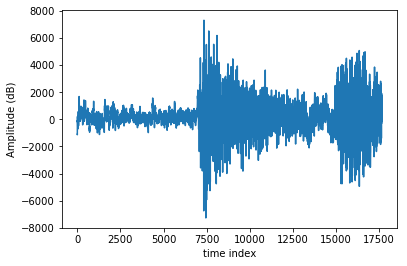

In [106]:
plt.figure()
tt = range(0, newsignal[calc_2Dsignal_index(0.4, 17.45), :].shape[0])
plt.plot(tt, newsignal[calc_2Dsignal_index(0.4, 17.45), :])
plt.ylabel('Amplitude (dB)')
plt.xlabel('time index')


## Do the manual labeling based on the time stamps and segmented signal 


In [250]:
# how many classes:
# class 0: background | class 1: bumping event(abrupt loud sound, robot cross door threshold) 
# | class 2: people talking |

labels = np.zeros([num_segment, 1])

### Multi-class Classification (0, 1, 2)

In [8]:
#labels = time_to_index(0.4, 0, 3, labels, 0)
labels = time_to_index(0.4, 3.03, 3.17, labels, 1) # food steps, or knocking continuously.
labels = time_to_index(0.4, 3.39, 3.48, labels, 1) # food steps, or knocking continuously.
labels = time_to_index(0.4, 4.16, 4.20, labels, 1) # food steps, or knocking continuously.

labels = time_to_index(0.4, 5.39, 5.41, labels, 1) # abrupt sound.
labels = time_to_index(0.4, 6.20, 6.21, labels, 1) # abrupt sound.
labels = time_to_index(0.4, 8.38, 8.39, labels, 1) # abrupt sound.

labels = time_to_index(0.4, 9.21, 9.26, labels, 1) # robot crossing door threshold
labels = time_to_index(0.4, 9.34, 9.43, labels, 1) # robot crossing door threshold
labels = time_to_index(0.4, 10.25, 10.28, labels, 1) # robot crossing door threshold
labels = time_to_index(0.4, 13.03, 13.07, labels, 1) # robot crossing door threshold
labels = time_to_index(0.4, 13.25, 13.30, labels, 1) # robot crossing door threshold
labels = time_to_index(0.4, 13.33, 13.37, labels, 1) # robot crossing door threshold
labels = time_to_index(0.4, 13.55, 13.58, labels, 1) # robot crossing door threshold
labels = time_to_index(0.4, 14.23, 14.33, labels, 1) # robot crossing door threshold
labels = time_to_index(0.4, 13.55, 13.58, labels, 1) # robot crossing door threshold
labels = time_to_index(0.4, 14.59, 15.02, labels, 1) # robot crossing door threshold
labels = time_to_index(0.4, 15.18, 15.23, labels, 1) # robot crossing door threshold

labels = time_to_index(0.4, 16.35, 16.38, labels, 1) # robot crossing door threshold
labels = time_to_index(0.4, 16.35, 16.38, labels, 1) # robot crossing door threshold

labels = time_to_index(0.4, 17.00, 17.08, labels, 1) # robot wheel rolling sound, loud
labels = time_to_index(0.4, 17.10, 17.12, labels, 1) # robot crossing door threshold

labels = time_to_index(0.4, 17.10, 17.12, labels, 1) # robot crossing door threshold

labels = time_to_index(0.4, 17.10, 17.12, labels, 1) # robot crossing door threshold

labels = time_to_index(0.4, 17.22, 17.26, labels, 1) # robot crossing door threshold
labels = time_to_index(0.4, 17.27, 17.35, labels, 1) # robot squeaky floor

labels = time_to_index(0.4, 17.52, 17.55, labels, 1) # robot crossing door threshold

labels = time_to_index(0.4, 18.06, 18.09, labels, 1) # robot crossing door threshold

labels = time_to_index(0.4, 18.06, 18.09, labels, 1) # robot crossing door threshold

###### Out of the squeaky floor #######

labels = time_to_index(0.4, 19.10, 18.09, labels, 1) # robot crossing door threshold


#### In the server room, loud background (until 27:15min)


labels = time_to_index(0.4, 31.05, 32.28, labels, 2) # people talking

labels = time_to_index(0.4, 33.22, 33.45, labels, 1) # people running

labels = time_to_index(0.4, 33.54, 33.59, labels, 1) # robot crossing door threshold


labels = time_to_index(0.4, 40.20, 43.24, labels, 2) # people talking

labels = time_to_index(0.4, 43.57, 44.03, labels, 1) # robot knocking over furniture
labels = time_to_index(0.4, 44.12, 44.18, labels, 1) # robot knocking over furniture
labels = time_to_index(0.4, 44.23, 44.44, labels, 1) # robot knocking over furniture

labels = time_to_index(0.4, 47.16, 47.20, labels, 1) # robot bump into wall

labels = time_to_index(0.4, 47.22, 47.26, labels, 2) # people talking
labels = time_to_index(0.4, 47.34, 47.39, labels, 2) # people talking




## imbalanced dataset, most of the window frames are background noise

In [9]:
labels[labels==0].shape

(6010,)

In [10]:
labels[labels==1].shape

(476,)

In [11]:
labels[labels==2].shape

(694,)

# Spectrograms for different sound events

### Quiet background

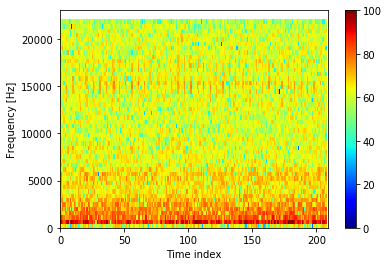

In [33]:
index = calc_2Dsignal_index(0.4, 5) 
f, t, Sxx = plot_spectrogram_segmented(newsignal, index, sample_rate, plot_option=True)

### Loud background

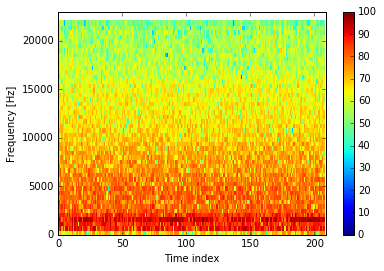

In [922]:
index = calc_2Dsignal_index(0.4, 20) 
f, t, Sxx3 = plot_spectrogram_segmented(newsignal, index, sample_rate, plot_option=True)

### bumping sound / abnormal event

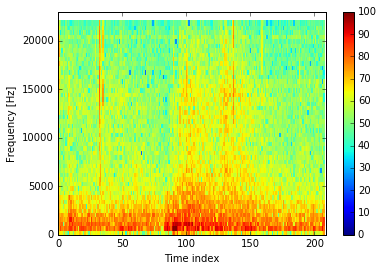

In [722]:
index = calc_2Dsignal_index(0.4, 10.26) 
f, t, Sxx1 = plot_spectrogram_segmented(newsignal, index, sample_rate, plot_option=True)

### people talking



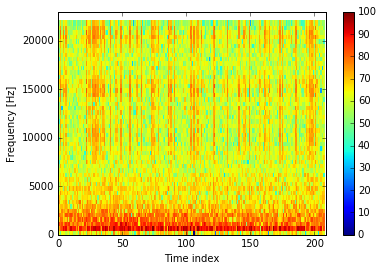

In [941]:
index = calc_2Dsignal_index(0.4, 31.75) # 40ms window frame, at time 31:20 (talking period) in the audio file, 
f, t, Sxx1 = plot_spectrogram_segmented(newsignal, index, sample_rate, plot_option=True)

# Calculate all the spectrogram images: mean in the sliding window and difference from the mean

In [10]:
Sxx_all = np.zeros([49, 209, newsignal.shape[0]])

In [11]:
for ii in range(0, newsignal.shape[0]):
    Sxx_all[:,:,ii] = plot_spectrogram_segmented(newsignal, ii, sample_rate)  

In [12]:
mean_spectra, diff_spectra = sliding_window_spectra(Sxx_all, sample_rate)

In [13]:
mean_spectra.shape

(49, 209, 7178)

## Feature extraction from spectrogram images using PCA

In [15]:
from sklearn.decomposition import PCA
from numpy.random import RandomState

from sklearn.metrics import roc_curve, auc, precision_score, recall_score, accuracy_score
from sklearn import grid_search
from sklearn import neighbors, datasets
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn import svm

from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV

from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score  
from sklearn.metrics import accuracy_score 
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.preprocessing import normalize

from time import time

In [ ]:
Sxx_log = np.zeros([mean_spectra.shape[0], mean_spectra.shape[1], mean_spectra.shape[-1]])
feature_vector_mean = np.zeros([mean_spectra.shape[0] * mean_spectra.shape[1], mean_spectra.shape[-1]])

# 2D array, #row = #samples, #column (#element in the row) = dimension of the images (without resize)

for ii in range(0, diff_spectra.shape[-1]):
    Sxx_log[:,:,ii] = 20.*np.log10(np.abs(mean_spectra[:,:,ii])) # in power 
    
    temp = Sxx_log[:,:,ii]
    temp[temp < 0] = 0
    feature_vector_mean[:,ii] =  temp.flatten()
del Sxx_log

In [17]:
Sxx_log = np.zeros([diff_spectra.shape[0], diff_spectra.shape[1], diff_spectra.shape[-1]])
feature_vector_diff = np.zeros([diff_spectra.shape[0] * diff_spectra.shape[1], diff_spectra.shape[-1]])

for ii in range(0, diff_spectra.shape[-1]):
    Sxx_log[:,:,ii] = 20.*np.log10(np.abs(mean_spectra[:,:,ii]))    
    feature_vector_diff[:,ii] =  Sxx_log[:,:,ii].flatten()
del Sxx_log

In [19]:
n_samples = feature_vector_mean.shape[-1]
n_features = feature_vector_mean.shape[0]
print(n_samples)
print(n_features)
feature_vector_mean.shape

7178
10241


(10241, 7178)

In [20]:
#n_components = 50 # play with the number
n_components = 30

feature_vector_all = np.concatenate((feature_vector_mean, feature_vector_diff), axis=0)
feature_vector_all = feature_vector_all.transpose()


In [99]:
feature_vector_all.shape

(7178, 20482)

In [100]:
#Extracting the top n_components eigenfaces 

t0 = time()

pca = PCA(n_components=n_components, whiten=True)
pca.fit(feature_vector_all)

print("PCA done in %0.3fs" % (time() - t0))

PCA done in 21.544s


### generated feature vectors for each sample/spectrogram

In [103]:
feature_pca_all = pca.transform(feature_vector_all)


### Oversampling of minority classes

In [139]:
from imblearn.over_sampling import SMOTE 

In [140]:
sm = SMOTE(random_state=42)

In [150]:
y = labels[1:-1]

# Oversample class 0 and class 1
y_class0 = y
y_class0 = y_class0[y_class0!=2]

In [151]:
x_class0 = feature_pca_all[(y_class0!=2).flatten(), :]


//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 7178 but corresponding boolean dimension is 6702
  if __name__ == '__main__':


In [153]:
X_rest1, y_rest1 = sm.fit_sample(x_class0, y_class0) # balanced classes: 0 and 1

In [ ]:
# Oversample class 0 and class 2
y_class0 = y
y_class0 = y_class0[y_class0!=1]

x_class0 = feature_pca_all[(y_class0!=1).flatten(), :]

X_rest2, y_rest2 = sm.fit_sample(x_class0, y_class0) # balanced classes: 0 and 2


In [154]:
y_now = np.concatenate((y_rest1, y_rest2[y_rest2==2]), axis = 0)
X_now = np.concatenate((X_rest1, X_rest2[y_rest2==2]), axis=0)

## Training-test splits

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X_now, y_now, test_size=0.3, random_state=10)

## Predictive Modeling using Random Forest Classifier

In [158]:
clf = RandomForestClassifier(n_jobs=-1, random_state = 140, n_estimators=100) 

clf.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=-1, oob_score=False, random_state=140,
            verbose=0, warm_start=False)

In [159]:
y_pred = clf.predict(X_test)

In [160]:
precision, recall, fscore, support = score(y_test, y_pred)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support)) # number of occurrences of each label 

print(accuracy_score(y_test, y_pred), 'accuracy')




precision: [ 0.8994152   0.91775599  0.82330827]
recall: [ 0.84925456  0.93976576  0.84977827]
fscore: [ 0.87361545  0.92863048  0.83633388]
support: [1811 1793 1804]
0.879437869822 accuracy


In [164]:
precision_score(y_test, y_pred, average='micro')

0.87943786982248517

# MFCC coefficient and Filter bank calculation: for more advanced audio features

Loud background noise -> higher absolute MFCC and filter bank coefficient

Quieter background noise -> lower absolute MFCC and filter bank coefficient

## Calculating all the filter_bank coefficient map along the time axis

Function Source: https://github.com/matarhaller/python_speech_features

/Users/ycheng30/anaconda/lib/python3.5/site-packages/features/base.py:156: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  fbank = numpy.zeros([nfilt,nfft/2+1])


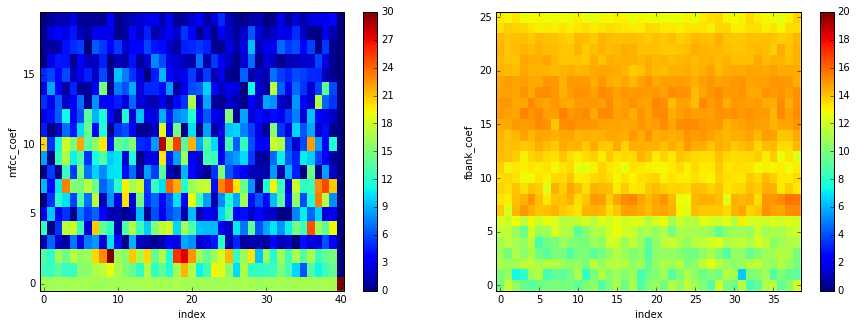

In [954]:
index = calc_2Dsignal_index(0.4, 20) # loud background, 
mfcc_feat, fbank_feat = plot_mfcc(newsignal,index,sample_rate)


/Users/ycheng30/anaconda/lib/python3.5/site-packages/features/base.py:156: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  fbank = numpy.zeros([nfilt,nfft/2+1])


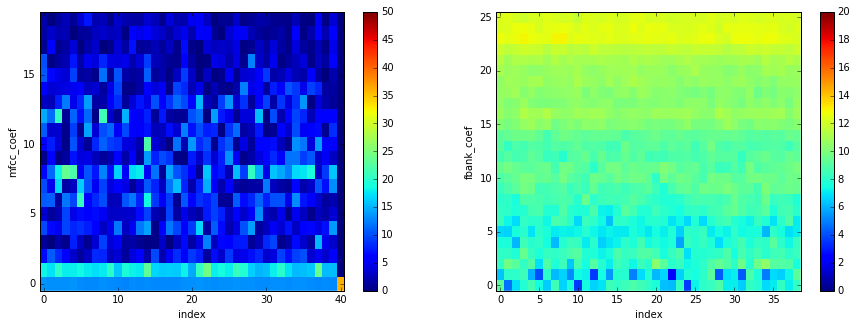

In [676]:
index = calc_2Dsignal_index(0.4, 5.0) # quiet background 
mfcc_feat, fbank_feat = plot_mfcc(newsignal,index,sample_rate)

/Users/ycheng30/anaconda/lib/python3.5/site-packages/features/base.py:156: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  fbank = numpy.zeros([nfilt,nfft/2+1])


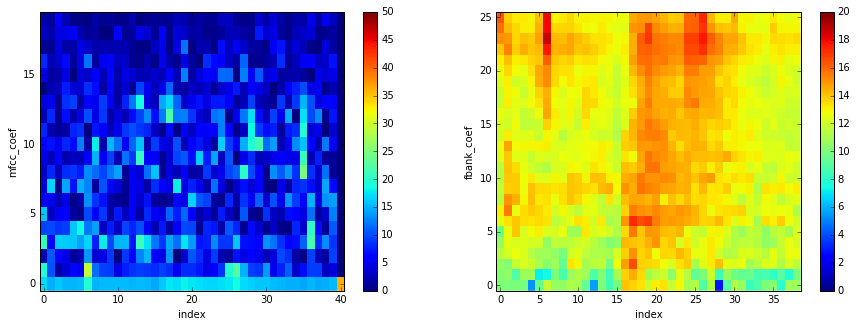

In [666]:
index = calc_2Dsignal_index(0.4, 10.26) # bumping event in the audio file
mfcc_feat, fbank_feat = plot_mfcc(newsignal,index,sample_rate)

/Users/ycheng30/anaconda/lib/python3.5/site-packages/features/base.py:156: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  fbank = numpy.zeros([nfilt,nfft/2+1])


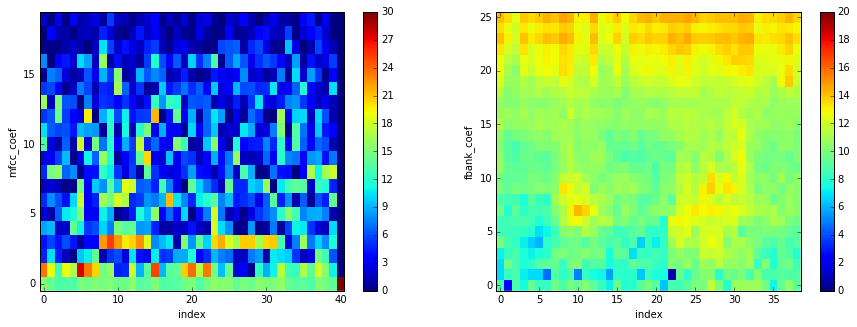

In [957]:
index = calc_2Dsignal_index(0.4, 31.8) # talking event in the audio file, 
mfcc_feat, fbank_feat = plot_mfcc(newsignal,index,sample_rate)